In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [6]:
img_width = 180
img_height = 180

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    batch_size = 32,
    image_size = (img_height, img_width),
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [64]:
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [16]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = False,
    batch_size = 32,
    image_size = (img_height, img_width),
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [17]:
data_test =  tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    batch_size = 32,
    image_size = (img_height, img_width),
    validation_split = False
)

Found 359 files belonging to 36 classes.


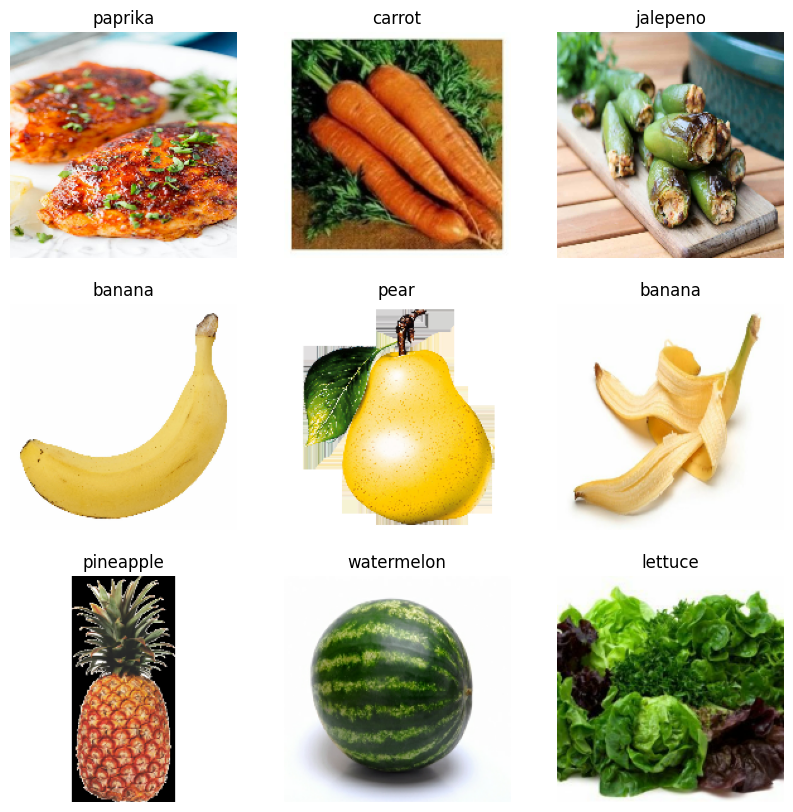

In [22]:
plt.figure(figsize=(10, 10))
for image , labele in data_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labele[i]])
        plt.axis("off")
    
    

In [27]:
from tensorflow.keras import Sequential

In [34]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3 , padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))   
])

In [35]:
model.compile(optimizer='adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'] )

In [36]:
epochs = 25

history = model.fit(data_train , validation_data=data_val, epochs=epochs, verbose=1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 511ms/step - accuracy: 0.0499 - loss: 3.9601 - val_accuracy: 0.2650 - val_loss: 2.8851
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.2076 - loss: 2.8161 - val_accuracy: 0.5043 - val_loss: 1.7873
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 412ms/step - accuracy: 0.3846 - loss: 2.1329 - val_accuracy: 0.7009 - val_loss: 1.2026
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 422ms/step - accuracy: 0.5554 - loss: 1.5374 - val_accuracy: 0.8148 - val_loss: 0.8052
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 494ms/step - accuracy: 0.7063 - loss: 1.0162 - val_accuracy: 0.8860 - val_loss: 0.5331
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 409ms/step - accuracy: 0.8213 - loss: 0.6092 - val_accuracy: 0.9145 - val_loss: 0.4684
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 398ms/step - accuracy: 0.9063 - loss: 0.3477 - val_accuracy: 0.9316 - val_loss: 0.3568
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 396ms/step - accuracy: 0.9307 - loss: 0.2514 - val_accu

In [38]:
epochs_range = range(epochs)
epochs_range

range(0, 25)

Text(0.5, 1.0, 'Accuracy')

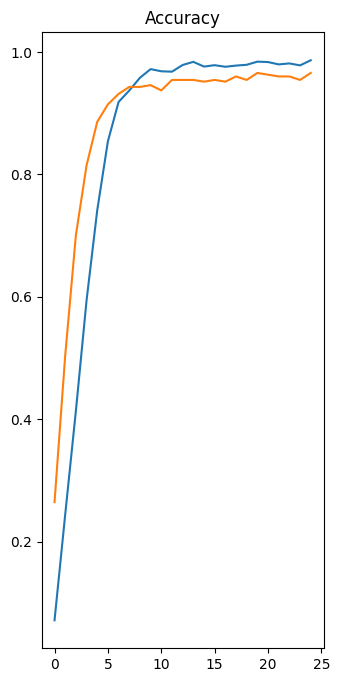

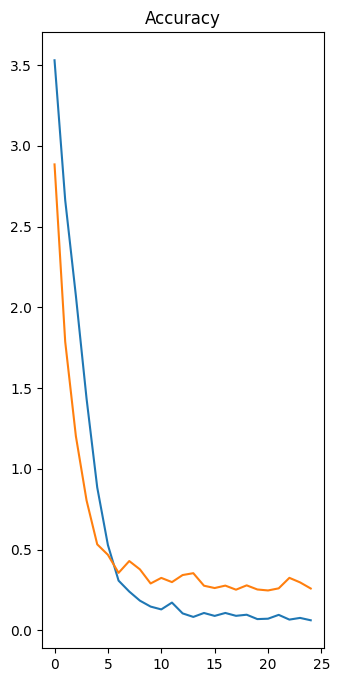

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range , history.history['accuracy'], label='Training Accuracy') 
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range , history.history['loss'], label='Training Accuracy') 
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Accuracy')

In [59]:
image = "corn.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height , img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bate = tf.expand_dims(img_arr, 0)

In [60]:
predict = model.predict(img_bate)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [61]:
score = tf.nn.softmax(predict)

In [62]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'. format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 84.82


In [63]:
model.save('Image_classify.keras')